## Problem: Rotting Oranges
LeetCode: 994

https://leetcode.com/problems/rotting-oranges/description/

You are given an m x n grid where each cell can have one of three values:

    0 representing an empty cell,
    1 representing a fresh orange, or
    2 representing a rotten orange.
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

 

Example 1:

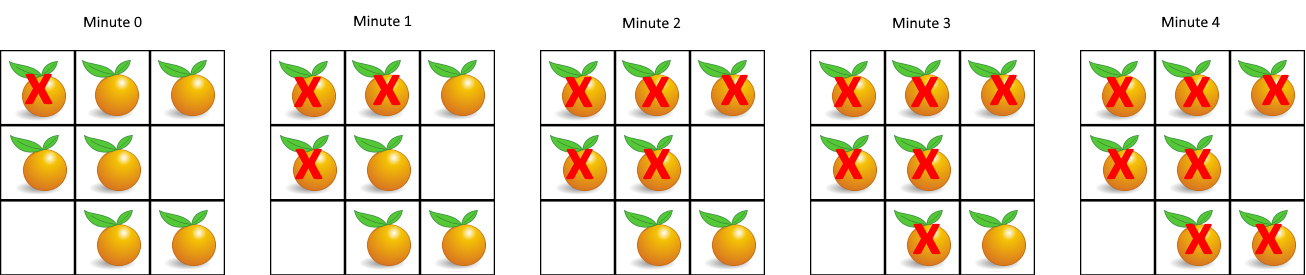
    
    Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
    Output: 4
Example 2:

    Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
    Output: -1
    Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.
Example 3:

    Input: grid = [[0,2]]
    Output: 0
    Explanation: Since there are already no fresh oranges at minute 0, the answer is just 0.
     

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 10
    grid[i][j] is 0, 1, or 2.

In [9]:
from collections import deque
def orangesRotting(grid):
    m = len(grid)
    q = deque()
    result = 0
    fresh = 0

    for i in range(m):
        for j in range(len(grid[i])):
            if grid[i][j] == 2:
                q.append((i,j))
            if grid[i][j] == 1:
                fresh += 1

    while q and fresh > 0:
        n = len(q)
        while n:
            r,c = q.popleft()
            nebrs = getnebrs(r,c,grid)
            for i, j in nebrs:
                if grid[i][j] == 1:
                    grid[i][j] = 2
                    q.append((i,j))
                    fresh -= 1
            n -= 1
        result += 1
    return result if fresh == 0 else -1
    
def getnebrs(r,c,grid):
    stack = []
    if r > 0:
        stack.append((r-1, c))
    if c > 0:
        stack.append((r, c-1))
    if r < len(grid)-1:
        stack.append((r+1, c))
    if c < len(grid[r])-1:
        stack.append((r, c+1))
    return stack

In [11]:
grid = [[2,1,1],[1,1,0],[0,1,1]]
orangesRotting(grid)

4